In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt
import torchvision
from IPython.display import display, Markdown
from tqdm import tqdm
import torchvision.transforms as transforms
import time

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
#Loading data
train_data = torchvision.datasets.MNIST(root="./data",train=True, download=True,transform = transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root = "./data",train=False,download=True, transform=transforms.ToTensor())

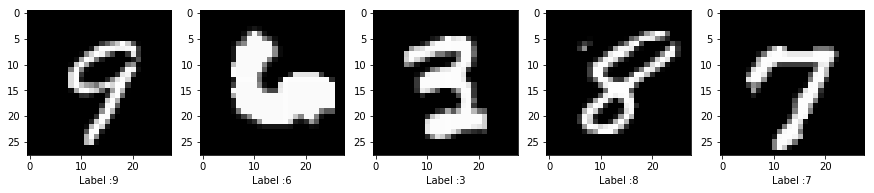

In [4]:
#Displaying random training images
ind = random.sample(range(0,len(train_data)),5)
fig = plt.figure(figsize=(15,10))
for i,index in enumerate(ind):
    num = train_data[index][0].reshape(28,28)
    label = train_data[index][1]
    ax = fig.add_subplot(1,5,i+1)
    ax.set_xlabel("Label :{}".format(label))
    plt.imshow(num,cmap="gray")

In [5]:
#Splitting into train and validation data
x_train,x_val = torch.utils.data.random_split(train_data,[int(0.75*len(train_data)),int(0.25*len(train_data))])

In [6]:
#Splitting into batches
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset = x_train,batch_size = batch_size)
val_loader = torch.utils.data.DataLoader(dataset = x_val,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_data,batch_size=batch_size)

In [7]:
#The classic LeNet5 model
class LeNet5(nn.Module):
    def __init__(self,output_size):
        super(LeNet5,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,6,kernel_size = 5, stride = 1,padding = 2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,kernel_size = 5, stride = 1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(16,120,kernel_size = 5, stride = 1),
            nn.BatchNorm2d(120),
            nn.ReLU()
        )
        
        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84,10)        
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.fc1(x.view(x.size(0),-1))
        x = self.fc2(x)
        return x

In [8]:
nepochs = 20
output_size = 10
lr = 0.001

model = LeNet5(output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=lr)

In [9]:
#Training
for epoch in range(nepochs):
    time.sleep(0.5)
    for i, (data, labels) in enumerate(tqdm(train_loader)):
        
        data = data.to(device)
        labels = labels.to(device)
                
        outputs = model(data)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, nepochs, loss.item()))

100%|██████████| 704/704 [00:06<00:00, 101.04it/s]


Epoch [1/20], Loss: 0.2855


100%|██████████| 704/704 [00:06<00:00, 105.89it/s]


Epoch [2/20], Loss: 0.0255


100%|██████████| 704/704 [00:06<00:00, 106.01it/s]


Epoch [3/20], Loss: 0.0133


100%|██████████| 704/704 [00:06<00:00, 105.61it/s]


Epoch [4/20], Loss: 0.0029


100%|██████████| 704/704 [00:06<00:00, 105.85it/s]


Epoch [5/20], Loss: 0.0011


100%|██████████| 704/704 [00:06<00:00, 105.87it/s]


Epoch [6/20], Loss: 0.0003


100%|██████████| 704/704 [00:06<00:00, 105.17it/s]


Epoch [7/20], Loss: 0.0001


100%|██████████| 704/704 [00:06<00:00, 105.59it/s]


Epoch [8/20], Loss: 0.0003


100%|██████████| 704/704 [00:06<00:00, 105.20it/s]


Epoch [9/20], Loss: 0.0012


100%|██████████| 704/704 [00:06<00:00, 106.20it/s]


Epoch [10/20], Loss: 0.0044


100%|██████████| 704/704 [00:06<00:00, 105.58it/s]


Epoch [11/20], Loss: 0.0000


100%|██████████| 704/704 [00:06<00:00, 105.75it/s]


Epoch [12/20], Loss: 0.0017


100%|██████████| 704/704 [00:06<00:00, 104.76it/s]


Epoch [13/20], Loss: 0.0198


100%|██████████| 704/704 [00:06<00:00, 105.96it/s]


Epoch [14/20], Loss: 0.0002


100%|██████████| 704/704 [00:06<00:00, 105.73it/s]


Epoch [15/20], Loss: 0.0001


100%|██████████| 704/704 [00:06<00:00, 105.10it/s]


Epoch [16/20], Loss: 0.0006


100%|██████████| 704/704 [00:06<00:00, 105.60it/s]


Epoch [17/20], Loss: 0.0008


100%|██████████| 704/704 [00:06<00:00, 105.57it/s]


Epoch [18/20], Loss: 0.0002


100%|██████████| 704/704 [00:06<00:00, 104.99it/s]


Epoch [19/20], Loss: 0.0000


100%|██████████| 704/704 [00:06<00:00, 105.72it/s]

Epoch [20/20], Loss: 0.0001


In [10]:
#Predictions on validation set
model.eval() #Tells batchnorm and droput layers to consider data as test
with torch.no_grad():
    correct = 0
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()        
print('Accuracy of the model on the {} validation images: {:.4f} %'.format(len(x_val),100*correct/ len(x_val)))

Accuracy of the model on the 15000 validation images: 98.9600 %


In [11]:
#Testing on test data
model.eval()
with torch.no_grad():
    correct = 0
    test_incorrect = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        
        #Storing incorrectly classifed images
        for item in (predicted != labels).nonzero():
            test_incorrect.append([images.data[item],predicted[item],labels[item]])
print('Accuracy of the model on the {} test images: {} %'.format(len(test_data),100*correct/ len(test_data)))

Accuracy of the model on the 10000 test images: 98.94 %


<h4>5 Incorrectly classified test images</h4>

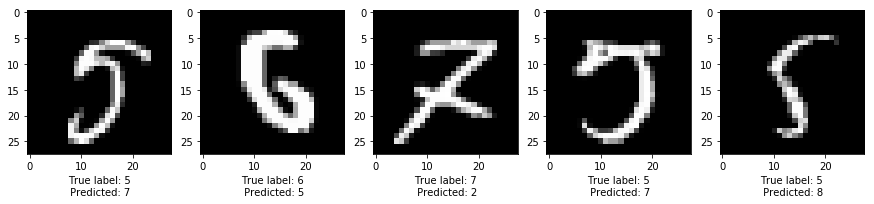

In [12]:
#Displaying some test images that the model misclassified
display(Markdown("<h4>5 Incorrectly classified test images</h4>"))
ind = random.sample(test_incorrect,5)
fig = plt.figure(figsize=(15,10))
for i,item in enumerate(ind):
    image = item[0].cpu().numpy().reshape(28,28)
    pred = item[1].item()
    label = item[2].item()
    ax = fig.add_subplot(1,5,i+1)
    ax.set_xlabel("True label: {}\n Predicted: {}".format(label,pred))
    plt.imshow(image,cmap="gray")